In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mlxtend.plotting import scatterplotmatrix
import seaborn as sb
import plotly.express as px
from sklearn.model_selection import train_test_split 
from sklearn.metrics.cluster import completeness_score
import datetime
import math
import plotly.express as px
from sklearn import tree

In [2]:
df = pd.read_csv("C:/Users/Victus/Desktop/bill_authentication.csv", delimiter=',', low_memory=False)
print(df.info())
df = df.dropna()
print(df)
y_pred = [0, 1, 2, 3]
y_true = [0, 1, 2, 3]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None
      Variance  Skewness  Curtosis  Entropy  Class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371

In [3]:
sas1 = [*df['Variance'].values]
sas2 = [*df['Skewness'].values]
sas3 = [*df['Curtosis'].values]
sas4 = [*df['Entropy'].values]
sas5 = [*df['Class'].values]
sas = []
for i in range(len(df['Variance'].values)) :
    sas.append([sas1[i], sas2[i], sas3[i], sas4[i], sas5[i]])
sas_array_X = np.asarray(sas)
sas_array_Y = np.asarray(sas5)
sas_array_name =  np.asarray([*df.head()])
print(sas_array_name)

['Variance' 'Skewness' 'Curtosis' 'Entropy' 'Class']


[Text(0.5, 0.75, 'x[4] <= 0.5\ngini = 0.494\nsamples = 1372\nvalue = [762, 610]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 762\nvalue = [762, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 610\nvalue = [0, 610]')]

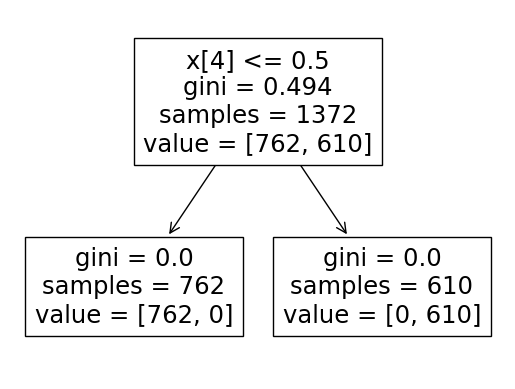

In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(sas_array_X, sas_array_Y)
tree.plot_tree(clf)

In [5]:
import graphviz

In [6]:
print(*df.head())

Variance Skewness Curtosis Entropy Class


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Создаём модель леса из сотни деревьев
model = RandomForestClassifier(n_estimators=10, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Обучаем на тренировочных данных
model.fit(sas_array_X, sas_array_Y)

RandomForestClassifier(n_estimators=10)

In [8]:
testq = []
for i in range(len(df['Variance'].values)) :
    testq.append([3.6216,8.6661,-2.8073,-0.44699,0])
test = np.asarray(testq)
rf_predictions = model.predict(test)
print(rf_predictions)
# Вероятности для каждого класса
rf_probs = model.predict_proba(test)[:, 1]
print(rf_probs)

[0 0 0 ... 0 0 0]
[0. 0. 0. ... 0. 0. 0.]


In [9]:
from sklearn.metrics import roc_auc_score

# Рассчитываем roc auc
roc_value = roc_auc_score(sas_array_Y, rf_probs)

In [10]:
print(roc_value)

0.5


In [11]:
import sklearn
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true, y_pred))

1.0


In [12]:
from sklearn.metrics import precision_score
print(precision_score(y_true, y_pred, average='macro'))
print(precision_score(y_true, y_pred, average='micro'))
print(precision_score(y_true, y_pred, average='weighted'))
print(precision_score(y_true, y_pred, average=None))
print(precision_score(y_true, y_pred, average=None, zero_division=1))
print(precision_score(y_true, y_pred, average=None, zero_division=np.nan))

1.0
1.0
1.0
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]


In [13]:
from sklearn.metrics import f1_score
print(f1_score(y_true, y_pred, average='macro'))
print(f1_score(y_true, y_pred, average='micro'))
print(f1_score(y_true, y_pred, average='weighted'))
print(f1_score(y_true, y_pred, average=None))

1.0
1.0
1.0
[1. 1. 1. 1.]


In [14]:
from sklearn.metrics import recall_score
print(recall_score(y_true, y_pred, average='macro'))
print(recall_score(y_true, y_pred, average='micro'))
print(recall_score(y_true, y_pred, average='weighted'))
print(recall_score(y_true, y_pred, average=None))

1.0
1.0
1.0
[1. 1. 1. 1.]
